In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('../data/raw/mental_health_conversations.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
df.head()

Dataset shape: (3512, 2)
Columns: ['Context', 'Response']


,Context,Response
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb..."
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see..."
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...


In [4]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())
print()

# Basic text length stats
df['context_length'] = df['Context'].str.len()
df['response_length'] = df['Response'].str.len()

print("Context length stats:")
print(df['context_length'].describe())
print()

print("Response length stats:")
print(df['response_length'].describe())

Missing values:
Context            0
Response           4
context_length     0
response_length    4
dtype: int64

Context length stats:
count    3512.000000
mean      282.652335
std       246.213884
min        25.000000
25%       147.000000
50%       232.000000
75%       348.250000
max      2703.000000
Name: context_length, dtype: float64

Response length stats:
count     3508.000000
mean      1027.238883
std       1010.811425
min          1.000000
25%        534.000000
50%        836.000000
75%       1274.000000
max      32739.000000
Name: response_length, dtype: float64


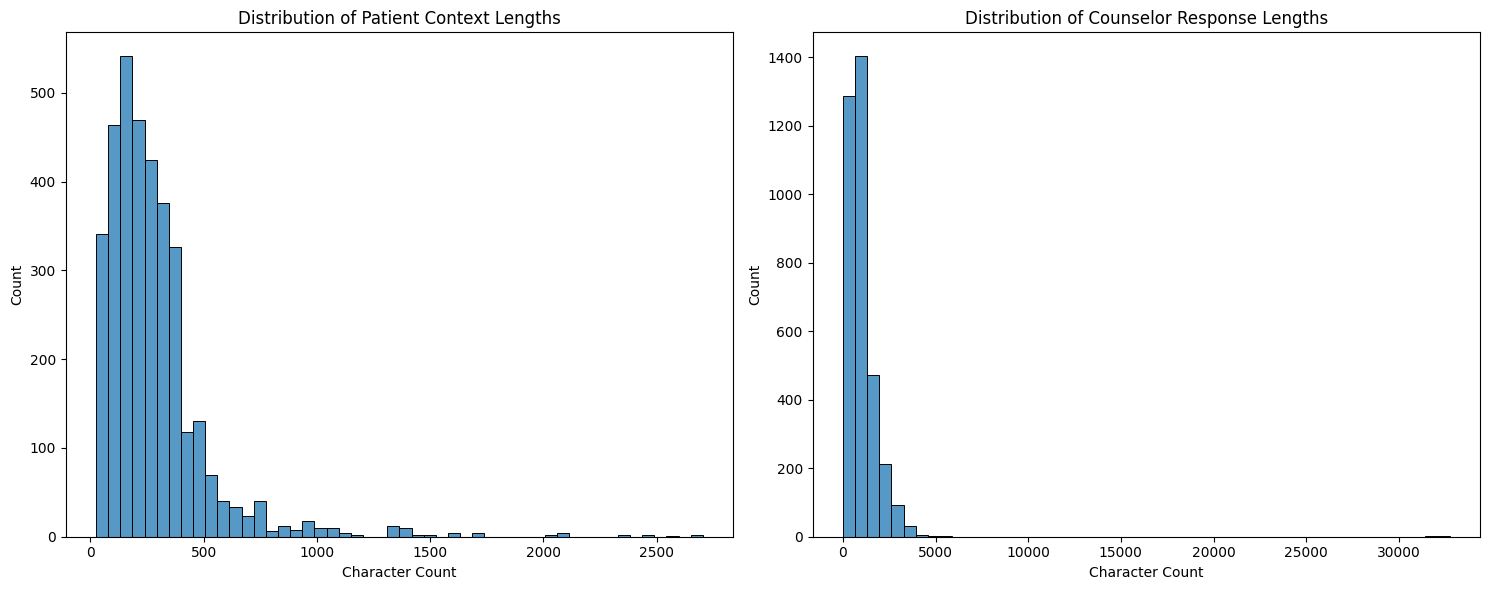

Example conversations:

Conversation 1:
Patient: I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think...
Counselor: If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Serious...
------------------------------

Conversation 2:
Patient: I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think...
Counselor: Hello, and thank you for your question and seeking advice on this. Feelings of worthlessness is unfo...
------------------------------

Conversation 3:
Patient: I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think...
Counselor: First thing I'd suggest is getting the sleep you need or it will impact how you think and feel. I'd ...
------------------------------


In [5]:
# Plot text length distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Context length distribution
sns.histplot(df['context_length'], bins=50, ax=ax1)
ax1.set_title("Distribution of Patient Context Lengths")
ax1.set_xlabel("Character Count")

# Response length distribution  
sns.histplot(df['response_length'], bins=50, ax=ax2)
ax2.set_title("Distribution of Counselor Response Lengths")
ax2.set_xlabel("Character Count")

plt.tight_layout()
plt.show()

# Show some example conversations
print("Example conversations:")
print("=" * 50)
for i in range(3):
    print(f"\nConversation {i+1}:")
    print(f"Patient: {df.iloc[i]['Context'][:100]}...")
    print(f"Counselor: {df.iloc[i]['Response'][:100]}...")
    print("-" * 30)

In [9]:
# Analyze counselor response patterns
response_categories = {
    'questions': ['?', 'how', 'what', 'when', 'why', 'where', 'who'],
    'validation': ['understand', 'valid', 'normal', 'hear you', 'makes sense'],
    'advice': ['try', 'consider', 'suggest', 'recommend', 'might help'],
    'reflection': ['sounds like', 'seems', 'feeling', 'it appears'],
    'empathy': ['sorry', 'difficult', 'hard', 'challenging', 'tough']
}

def categorize_response(text):
    # Handle NaN values
    if pd.isna(text) or not isinstance(text, str):
        return ['other']
    
    text_lower = text.lower()
    categories = []
    for category, keywords in response_categories.items():
        if any(keyword in text_lower for keyword in keywords):
            categories.append(category)
    return categories if categories else ['other']

# Apply categorization
df['response_types'] = df['Response'].apply(categorize_response)

# Count response types
from collections import Counter
all_types = [typ for types_list in df['response_types'] for typ in types_list]
type_counts = Counter(all_types)

print("Counselor Response Types:")
for response_type, count in type_counts.most_common():
    percentage = (count / len(df)) * 100
    print(f"{response_type}: {count} ({percentage:.1f}%)")

# Show examples of each type
print("\nExample responses by type:")
print("=" * 40)
for response_type in ['questions', 'validation', 'advice', 'empathy']:
    examples = df[df['response_types'].apply(lambda x: response_type in x)]
    if len(examples) > 0:
        print(f"\n{response_type.upper()} Example:")
        print(f"Patient: {examples.iloc[0]['Context'][:80]}...")
        print(f"Counselor: {examples.iloc[0]['Response'][:120]}...")
        print("-" * 30)

Counselor Response Types:
questions: 3146 (89.6%)
advice: 1648 (46.9%)
reflection: 1611 (45.9%)
validation: 1098 (31.3%)
empathy: 1019 (29.0%)
other: 125 (3.6%)

Example responses by type:

QUESTIONS Example:
Patient: I'm going through some things with my feelings and myself. I barely sleep and I ...
Counselor: If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social conte...
------------------------------

VALIDATION Example:
Patient: I'm going through some things with my feelings and myself. I barely sleep and I ...
Counselor: If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social conte...
------------------------------

ADVICE Example:
Patient: I'm going through some things with my feelings and myself. I barely sleep and I ...
Counselor: If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social conte...
-------